<a href="https://colab.research.google.com/github/hellojohnkim/mmai823/blob/main/Assignment%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
%matplotlib inline


2. List the S&P500 companies that have the top 5 highest trailing PE, and the top 5 with highest forward PE.

First, we get list of S&P500 companies and their tickers (stock symbols)

In [3]:
## scraping wikipedia table to get list of tickers of companies aka constituents

# There are 2 tables on the Wikipedia page, we want the first table
# second table shows the evolution of the changes

components = \
pd.read_html('https://en.wikipedia.org/wiki/List_of_S&P_500_companies')

first_table = components[0]
second_table = components[1]
sp_df = first_table
sp_df.Symbol
sp500_tickers = sp_df.Symbol

In [4]:
#make sure we have data = 503 symbols
sp500_tickers.info()

<class 'pandas.core.series.Series'>
RangeIndex: 503 entries, 0 to 502
Series name: Symbol
Non-Null Count  Dtype 
--------------  ----- 
503 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [5]:
#other data we got from wikipedia
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [6]:
##yahoo finance to call market cap of a stock
yf.Ticker('MSFT').info['marketCap']

3087347744768

In [9]:
#get PE data for tickers in S&P500


SP500_PE=[]


for ticker in sp500_tickers:
    try:
    #if symbol not in ['INFO', 'AES']:
        ticker=ticker.replace('.', '-')  #For dual shares, eg, BRK.B, we have to change it to BRK-B
        ticker_yahoo = yf.Ticker(ticker)
        print(ticker,round(ticker_yahoo.info['forwardPE'],2))
        SP500_PE.append(
            {
                "Ticker":ticker,
                "trailingPE":round(ticker_yahoo.info['trailingPE'],2),
                "forwardPE": round(ticker_yahoo.info['forwardPE'],2),
            }
        )
    except:
        pass

SP500_PE=pd.DataFrame(SP500_PE)

MMM 9.01
AOS 19.39
ABT 23.21
ABBV 14.65
ACN 28.12
ADBE 28.11
AMD 37.18
AES 7.47
AFL 11.62
A 22.72
APD 17.59
ABNB 32.73
AKAM 15.04
ALB 14.57
ARE 36.34
ALGN 28.57
ALLE 16.77
LNT 14.51
ALL 9.43
GOOGL 17.54
GOOG 17.68
MO 7.8
AMZN 33.56
AMCR 12.45
AEE 14.47
AAL 4.77
AEP 14.26
AXP 14.88
AIG 9.0
AMT 32.08
AWK 21.18
AMP 11.13
AME 24.19
AMGN 13.27
APH 30.19
ADI 26.15
ANSS 31.48
AON 17.7
APA 6.13
AAPL 25.06
AMAT 22.09
APTV 10.96
ACGL 10.24
ADM 9.3
ANET 33.61
AJG 21.42
AIZ 10.65
T 7.38
ATO 15.97
ADSK 28.84
ADP 24.97
AZO 18.28
AVB 32.87
AVY 20.6
AXON 55.33
BKR 11.84
BALL 18.52
BAC 9.99
BK 9.44
BBWI 12.05
BAX 12.74
BDX 16.41
BRK-B 21.12
BBY 11.48
BIO 27.35
TECH 36.82
BIIB 12.53
BLK 17.85
BX 20.83
BA 25.58
BKNG 17.12
BWA 7.14
BXP 32.8
BSX 26.33
BMY 7.14
AVGO 24.97
BR 23.86
BRO 22.57
BF-B 28.48
BLDR 13.85
BG 9.45
CDNS 45.36
CZR 17.12
CPT 54.74
CPB 13.31
COF 8.33
CAH 14.15
KMX 22.99
CCL 11.76
CARR 18.33
CTLT 38.13
CAT 15.13
CBOE 20.9
CBRE 16.6
CDW 21.51
CE 10.97
COR 16.25
CNC 10.27
CNP 15.77
CF 13.07


In [10]:
SP500_PE

,Ticker,trailingPE,forwardPE
0,AOS,22.75,19.39
1,ABT,36.39,23.21
2,ABBV,65.78,14.65
3,ACN,35.34,28.12
4,ADBE,48.34,28.11
...,...,...,...
465,YUM,24.58,21.17
466,ZBRA,50.73,20.57
467,ZBH,25.36,14.29
468,ZION,8.91,8.36


Companies that have the top 5 highest trailing PE

In [16]:
# top 5 companies with highest trailing PE
top5_trailingPE = SP500_PE.sort_values('trailingPE', ascending=False).head(5)
top5_trailingPE
top5_trailingPE.join(sp_df.set_index('Symbol'), on='Ticker')

,Ticker,trailingPE,forwardPE,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
297,MRK,906.86,13.01,Merck & Co.,Health Care,Pharmaceuticals,"Kenilworth, New Jersey",1957-03-04,310158,1891
5,AMD,382.34,37.18,Advanced Micro Devices,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,2488,1969
442,VTRS,251.80,4.46,Viatris,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
107,CLX,245.29,23.40,Clorox,Consumer Staples,Household Products,"Oakland, California",1969-03-31,21076,1913
13,ARE,234.47,36.34,Alexandria Real Estate Equities,Real Estate,Office REITs,"Pasadena, California",2017-03-20,1035443,1994


Companies that have the top 5 highest forward PE

In [17]:
# top 5 companies with highest forward PE
top5_forwardPE = SP500_PE.sort_values('forwardPE', ascending=False).head(5)
top5_forwardPE
top5_forwardPE.join(sp_df.set_index('Symbol'), on='Ticker')

,Ticker,trailingPE,forwardPE,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
139,DLR,50.20,128.72,Digital Realty,Real Estate,Data Center REITs,"Austin, Texas",2016-05-18,1297996,2004
428,UDR,26.82,74.88,"UDR, Inc.",Real Estate,Multi-Family Residential REITs,"Highlands Ranch, Colorado",2016-03-07,74208,1972
167,EQIX,87.69,68.48,Equinix,Real Estate,Data Center REITs,"Redwood City, California",2015-03-20,1101239,1998
124,CSGP,95.95,68.43,CoStar Group,Real Estate,Real Estate Services,"Washington, D.C.",2022-09-19,1057352,1987
455,WELL,134.38,56.19,Welltower,Real Estate,Health Care REITs,"Toledo, Ohio",2009-01-30,766704,1970


5 Companies that have the lowest trailing PE

In [18]:
# companies with lowest trailing PE
bottom5_trailingPE = SP500_PE.sort_values('trailingPE', ascending=True).head(5)
bottom5_trailingPE
bottom5_trailingPE.join(sp_df.set_index('Symbol'), on='Ticker')

,Ticker,trailingPE,forwardPE,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
36,APA,3.29,6.13,APA Corporation,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,1841666,1954
191,FMC,5.07,11.42,FMC Corporation,Materials,Fertilizers & Agricultural Chemicals,"Philadelphia, Pennsylvania",2009-08-19,37785,1883
207,GM,5.60,4.49,General Motors,Consumer Discretionary,Automobile Manufacturers,"Detroit, Michigan",2013-06-06,1467858,1908
431,UAL,5.68,3.88,United Airlines Holdings,Industrials,Passenger Airlines,"Chicago, Illinois",2015-09-03,100517,1967
436,VLO,5.75,10.87,Valero Energy,Energy,Oil & Gas Refining & Marketing,"San Antonio, Texas",2002-12-20,1035002,1980


Companies that have the top 5 lowest forward PE

In [19]:
# companies with lowest forward PE
bottom5_forwardPE = SP500_PE.sort_values('forwardPE', ascending=True).head(5)
bottom5_forwardPE
bottom5_forwardPE.join(sp_df.set_index('Symbol'), on='Ticker')

,Ticker,trailingPE,forwardPE,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
431,UAL,5.68,3.88,United Airlines Holdings,Industrials,Passenger Airlines,"Chicago, Illinois",2015-09-03,100517,1967
442,VTRS,251.80,4.46,Viatris,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
207,GM,5.60,4.49,General Motors,Consumer Discretionary,Automobile Manufacturers,"Detroit, Michigan",2013-06-06,1467858,1908
23,AAL,12.94,4.77,American Airlines Group,Industrials,Passenger Airlines,"Fort Worth, Texas",2015-03-23,6201,1934
172,EG,6.15,5.39,Everest Re,Financials,Reinsurance,"Hamilton, Bermuda",2017-06-19,1095073,1973


3. Suppose that you want to establish a portfolio among only those S&P 500 companies with the following features:
    a. Market Cap between the 40-60% quantile
    b. Foward PE among the 30-50% quantile

We have PE data. We need to get Market Cap data

In [20]:
##get market capitalization from yahoo fiance ticker function and put them into a df

SP500_MKTCAP=[]


for ticker in sp500_tickers:
    try:
    #if symbol not in ['INFO', 'AES']:
        ticker=ticker.replace('.', '-')  #For dual shares, eg, BRK.B, we have to change it to BRK-B
        ticker_yahoo = yf.Ticker(ticker)
        print(ticker,round(ticker_yahoo.info['marketCap']))
        SP500_MKTCAP.append(
            {
                "Ticker":ticker,
                "marketCap":ticker_yahoo.info['marketCap'],
            }
        )
    except:
        pass

SP500_MKTCAP=pd.DataFrame(SP500_MKTCAP)

MMM 50771025920
AOS 12355549184
ABT 205827063808
ABBV 316039168000
ACN 238877671424
ADBE 258060353536
AMD 327423688704
AES 10988139520
AFL 46408753152
A 40750415872
APD 52463034368
ABNB 101879799808
AKAM 16646239232
ALB 16765149184
ARE 21740290048
ALGN 22977497088
ALLE 11101897728
LNT 12223652864
ALL 40814845952
GOOGL 1710396407808
GOOG 1710397063168
MO 72054972416
AMZN 1851242446848
AMCR 13138141184
AEE 18992515072
AAL 10253494272
AEP 44720459776
AXP 159005294592
AIG 49600684032
AMT 94091173888
AWK 23308279808
AMP 41178480640
AME 41739423744
AMGN 150234169344
APH 66469928960
ADI 97277313024
ANSS 29552984064
AON 62311182336
APA 9170226176
AAPL 2774291709952
AMAT 174696103936
APTV 22057797632
ACGL 32614742016
ADM 28930586624
ANET 89957302272
AJG 52799471616
AIZ 9379877888
T 121454370816
ATO 17004193792
ADSK 56631857152
ADP 102570409984
AZO 52559056896
AVB 25300332544
AVY 17447845888
AXON 23663904768
BKR 30196084736
BALL 20289466368
BAC 270425849856
BK 42135998464
BBWI 10320985088
BAX 20

In [21]:
SP500_MKTCAP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Ticker     502 non-null    object
 1   marketCap  502 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.0+ KB


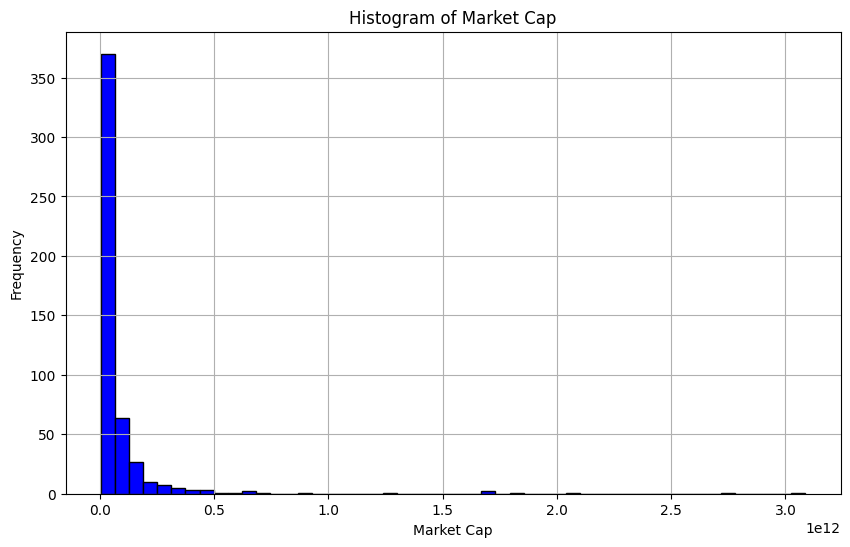

In [22]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(SP500_MKTCAP['marketCap'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Market Cap')
plt.xlabel('Market Cap')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Companies with Market Cap between 40-60% quantile

In [24]:
# companies with market cap between 40-60% quantile
lower_bound = SP500_MKTCAP['marketCap'].quantile(0.4)
upper_bound = SP500_MKTCAP['marketCap'].quantile(0.6)

marketcap_names = SP500_MKTCAP[(SP500_MKTCAP['marketCap'] > lower_bound) & (SP500_MKTCAP['marketCap'] < upper_bound)]
marketcap_names['Ticker']
marketcap_names.join(sp_df.set_index('Symbol'), on='Ticker')
#SP500_MKTCAP.query('@lower_bound < marketCap < @upper_bound').sort

,Ticker,marketCap,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
9,A,40750415872,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872.0,1999
18,ALL,40814845952,Allstate,Financials,Property & Casualty Insurance,"Northbrook, Illinois",1995-07-13,899051.0,1931
31,AMP,41178480640,Ameriprise Financial,Financials,Asset Management & Custody Banks,"Minneapolis, Minnesota",2005-10-03,820027.0,1894
32,AME,41739423744,Ametek,Industrials,Electrical Components & Equipment,"Berwyn, Pennsylvania",2013-09-23,1037868.0,1930
36,ANSS,29552984064,Ansys,Information Technology,Application Software,"Canonsburg, Pennsylvania",2017-06-19,1013462.0,1969
...,...,...,...,...,...,...,...,...,...
492,WTW,27790796800,Willis Towers Watson,Financials,Insurance Brokers,"London, United Kingdom",2016-01-05,1140536.0,2016
495,XEL,27519080448,Xcel Energy,Utilities,Multi-Utilities,"Minneapolis, Minnesota",1957-03-04,72903.0,1909
496,XYL,30910304256,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472.0,2011
497,YUM,38661193728,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061.0,1997


In [ ]:
marketcap_names['Ticker']

9        A
18     ALL
26     AEP
31     AMP
32     AME
      ... 
492    WTW
495    XEL
496    XYL
497    YUM
499    ZBH
Name: Ticker, Length: 100, dtype: object

In [ ]:
# export the list as csv file
marketcap_names.to_csv('marketcap_portfolio.csv')

Companies with Foward PE among the 30-50% quantile

In [26]:
# companies with Forward PE between 30-50% quantile
lower_bound = SP500_PE['forwardPE'].quantile(0.3)
upper_bound = SP500_PE['forwardPE'].quantile(0.5)

forwardPE_names = SP500_PE[(SP500_PE['forwardPE'] > lower_bound) & (SP500_PE['forwardPE'] < upper_bound)]
forwardPE_names.join(sp_df.set_index('Symbol'), on='Ticker')
#SP500_MKTCAP.query('@lower_bound < marketCap < @upper_bound').sort

,Ticker,trailingPE,forwardPE,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
2,ABBV,65.78,14.65,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
11,AKAM,31.32,15.04,Akamai,Information Technology,Internet Services & Infrastructure,"Cambridge, Massachusetts",2007-07-12,1086222,1998
12,ALB,10.68,14.57,Albemarle Corporation,Materials,Specialty Chemicals,"Charlotte, North Carolina",2016-07-01,915913,1994
15,ALLE,20.72,16.77,Allegion,Industrials,Building Products,"Dublin, Ireland",2013-12-02,1579241,1908
16,LNT,17.17,14.51,Alliant Energy,Utilities,Electric Utilities,"Madison, Wisconsin",2016-07-01,352541,1917
...,...,...,...,...,...,...,...,...,...,...
433,URI,19.84,14.91,United Rentals,Industrials,Trading Companies & Distributors,"Stamford, Connecticut",2014-09-20,1067701,1997
434,UNH,20.53,15.61,UnitedHealth Group,Health Care,Managed Health Care,"Minnetonka, Minnesota",1994-07-01,731766,1977
453,WEC,18.58,14.99,WEC Energy Group,Utilities,Electric Utilities,"Milwaukee, Wisconsin",2008-10-31,783325,1896
460,WTW,27.25,14.63,Willis Towers Watson,Financials,Insurance Brokers,"London, United Kingdom",2016-01-05,1140536,2016


In [28]:
# export the list as csv file
forwardPE_names.to_csv('forwardPE_portfolio.csv')

4. Based on the returns from the stocks in the S&P500 Index

4.1 Group the stocks by sectors 'GICS Sector', compute and the average rate of returns for the stocks in the same sector.

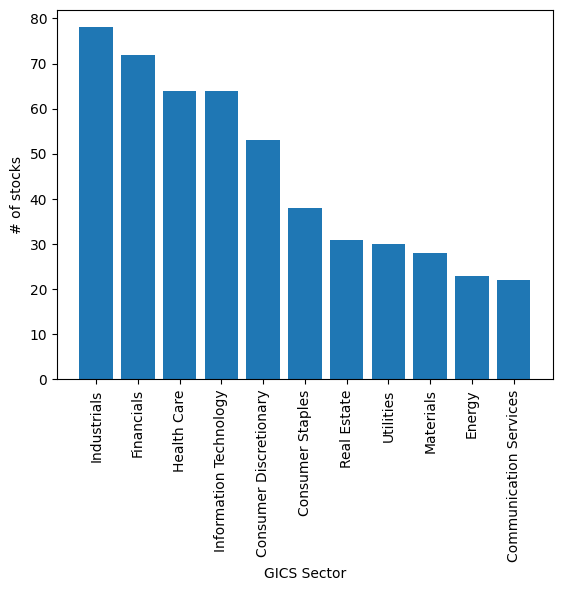

<Figure size 800x600 with 0 Axes>

In [29]:
##Quick EDA on the GICS sector distribution

sectors_counts = sp_df["GICS Sector"].value_counts()
plt.bar(sectors_counts.index, sectors_counts.values)
plt.xticks(rotation=90)
plt.xlabel("GICS Sector")
plt.ylabel("# of stocks")
plt.figure(figsize=(8,6))
plt.show()

In [30]:
#creating lists of tickers/symbols for each sector
industrials = sp_df.where(sp_df['GICS Sector'] == 'Industrials')['Symbol'].dropna().values.tolist()
financials = sp_df.where(sp_df['GICS Sector'] == 'Financials')['Symbol'].dropna().values.tolist()
healthcare = sp_df.where(sp_df['GICS Sector'] == 'Health Care')['Symbol'].dropna().values.tolist()
infotech = sp_df.where(sp_df['GICS Sector'] == 'Information Technology')['Symbol'].dropna().values.tolist()
consdisc = sp_df.where(sp_df['GICS Sector'] == 'Consumer Discretionary')['Symbol'].dropna().values.tolist()
consstap = sp_df.where(sp_df['GICS Sector'] == 'Consumer Staples')['Symbol'].dropna().values.tolist()
realestate = sp_df.where(sp_df['GICS Sector'] == 'Real Estate')['Symbol'].dropna().values.tolist()
utilities = sp_df.where(sp_df['GICS Sector'] == 'Utilities')['Symbol'].dropna().values.tolist()
materials = sp_df.where(sp_df['GICS Sector'] == 'Materials')['Symbol'].dropna().values.tolist()
energy = sp_df.where(sp_df['GICS Sector'] == 'Energy')['Symbol'].dropna().values.tolist()
comms = sp_df.where(sp_df['GICS Sector'] == 'Communication Services')['Symbol'].dropna().values.tolist()

In [31]:
# Function to calculate average annual return for a list of tickers
def calculate_average_annual_return(sp500_tickers):
    start_date = "2000-01-01"  # 23 year period since 2000
    end_date = "2023-12-29"
    annual_returns = []

    for ticker in sp500_tickers:
        # Fetch historical data
        data = yf.download(ticker, start=start_date, end=end_date)

        # Calculate annual return
        if not data.empty:
            total_return = data['Adj Close'][-1] / data['Adj Close'][0] - 1
            annual_return = (1 + total_return) ** (1/23) - 1  # Compound annual growth rate (CAGR) for 23 year period
            annual_returns.append(annual_return)

    # Return the average annual return for the sector
    return np.mean(annual_returns) if annual_returns else None

# Calculate average annual return for each sector
industrials_avg_return = calculate_average_annual_return(industrials)
financials_avg_return = calculate_average_annual_return(financials)
healthcare_avg_return = calculate_average_annual_return(healthcare)
infotech_avg_return = calculate_average_annual_return(infotech)
consdisc_avg_return = calculate_average_annual_return(consdisc)
consstap_avg_return = calculate_average_annual_return(consstap)
realestate_avg_return = calculate_average_annual_return(realestate)
utilities_avg_return = calculate_average_annual_return(utilities)
materials_avg_return = calculate_average_annual_return(materials)
energy_avg_return = calculate_average_annual_return(energy)
comms_avg_return = calculate_average_annual_return(comms)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [32]:

# Print the results
print("Industrials Average Return:", industrials_avg_return)
print("Financials Average Return:", financials_avg_return)
print("Health Care Average Return:", healthcare_avg_return)
print("Information Technology Average Return:", infotech_avg_return)
print("Consumer Discretionary Average Return:", consdisc_avg_return)
print("Consuer Staple Average Return:", consstap_avg_return)
print("Real Estate Average Return:", realestate_avg_return)
print("Utilities Average Return:", utilities_avg_return)
print("Materials Average Return:", materials_avg_return)
print("Energy Average Return:", energy_avg_return)
print("Communication Servicves Average Return:", comms_avg_return)

Industrials Average Return: 0.11684917045661812
Financials Average Return: 0.0949239927969876
Health Care Average Return: 0.12415218055940784
Information Technology Average Return: 0.11098745229712632
Consumer Discretionary Average Return: 0.12284275537323791
Consuer Staple Average Return: 0.09282747497334395
Real Estate Average Return: 0.11288062865984326
Utilities Average Return: 0.09127185359435236
Materials Average Return: 0.09851837163502931
Energy Average Return: 0.09965521706970713
Communication Servicves Average Return: 0.07368550276037084


Based on the average returns from 2000 to 2023, discuss the performance of the stocks in different sectors.
